# Data Processing

## 1. Labeling

The datasets used in this section are:
- [project.cvs](https://github.com/GokuMohandas/Made-With-ML/blob/main/datasets/projects.csv): projects with id, create time, title and description.
- [tags.csv](https://github.com/GokuMohandas/Made-With-ML/blob/main/datasets/tags.csv): labels for project by id

In [1]:
import pandas as pd

In [5]:
# file links
PROJECT_URL = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/projects.csv"
TAGS_URL = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/tags.csv"

In [6]:
projects = pd.read_csv(PROJECT_URL)
projects.head(5)

,id,created_on,title,description
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla..."
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...
4,19,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...


In [8]:
tags = pd.read_csv(TAGS_URL)
tags.head(5)

,id,tag
0,6,computer-vision
1,7,computer-vision
2,9,graph-learning
3,15,reinforcement-learning
4,19,graph-learning


In [9]:
df = pd.merge(projects, tags, on="id")
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",graph-learning
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,reinforcement-learning
4,19,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...,graph-learning


In [11]:
# remove projects with no tag
df = df[df.tag.notnull()]

In [12]:
# exporting data
df.to_csv("labeled_projects.csv", index=False)

## 2. Exploration (EDA)

EDA - Exploratory data analysis, aims to understand the signals and nuances of the dataset. **It is a cyclical process that can be done at various points of our development process.** For instance, if we're unsure how to label or preprocess out data, we can use EDA to figure it out.

In [33]:
from collections import Counter
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
sns.set_theme()
warnings.filterwarnings("ignore")

In [42]:
# Distribution of tags
tags, tag_counts = zip(*Counter(df.tag.values).most_common())
print("Tags: ", list(tags))
print("\nTag counts: ", list(tag_counts))

Tags:  ['natural-language-processing', 'computer-vision', 'mlops', 'reinforcement-learning', 'graph-learning', 'time-series']

Tag counts:  [388, 356, 79, 56, 45, 31]


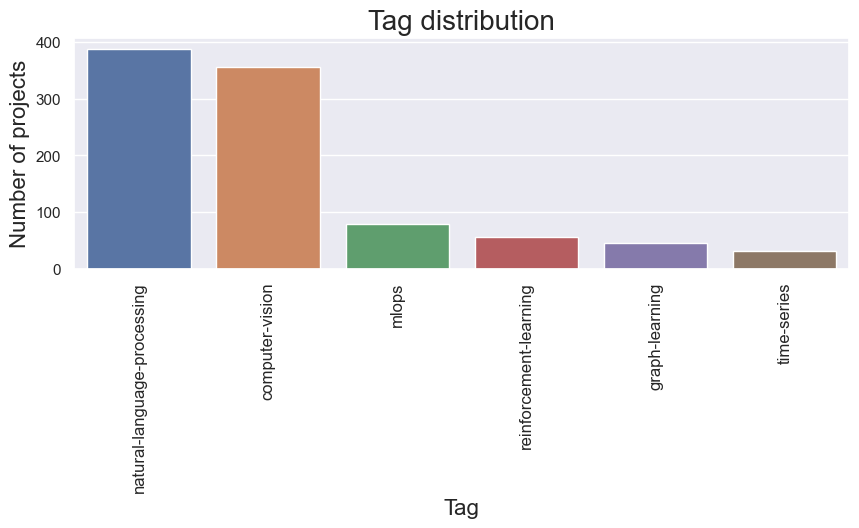

In [52]:
plt.figure(figsize=(10, 3))
ax = sns.barplot(pd.DataFrame({"tags": tags, "counts": tag_counts}),
                 x="tags", y="counts")
plt.title("Tag distribution", fontsize=20)
plt.xlabel("Tag", fontsize=16)
ax.set_xticklabels(tags, rotation=90, fontsize=12)
plt.ylabel("Number of projects", fontsize=16)
plt.show()

*It's quiute obvious that there's a data imbalance in our dataset. We'll address this issue later.*

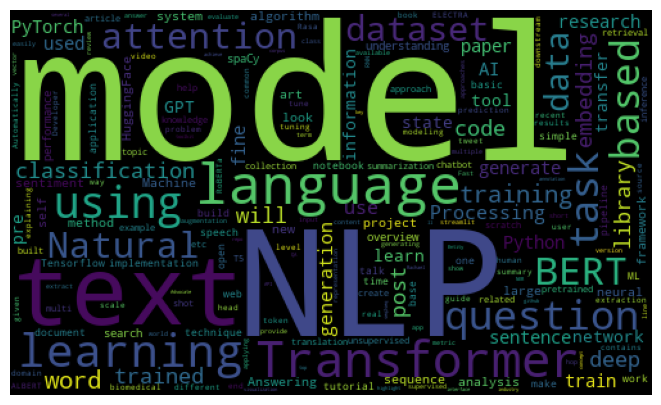

interactive(children=(Dropdown(description='tag', options=('natural-language-processing', 'computer-vision', '…

In [59]:
# Most frequent tokens for each tag
@widgets.interact(tag=list(tags))
def display_word_could(tag="natural-language-processing"):
    plt.figure(figsize=(15, 5))
    subset = df[df.tag==tag]
    text = subset.description.values
    cloud = WordCloud(
        stopwords=STOPWORDS, background_color="black", collocations=False,
        width=500, height=300
        ).generate(" ".join(text))
    plt.axis("off")
    plt.imshow(cloud)